[0.         0.01383508 0.02765956 0.04146286 0.05523442 0.06896367
 0.08264011 0.09625327 0.10979272 0.12324809]
[1.         0.99990427 0.99961711 0.99913856 0.99846872 0.99760773
 0.99655573 0.99531294 0.99387959 0.99225596]
[1.         1.01373935 1.02727667 1.04060143 1.05370314 1.0665714
 1.07919584 1.09156621 1.10367231 1.11550404]
Number of samples 10000
Timestep in ms 5.0005000500050007e-08
Sample Rate =  44100
220500
Total time = Sample Rate/No. of Samples =  5.0


c:\Users\RND4\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\RND4\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\RND4\anaconda3\Lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


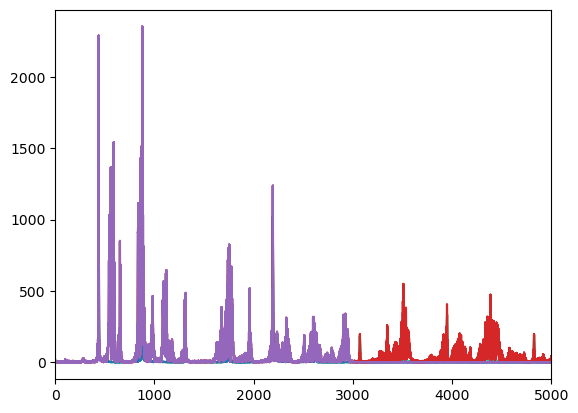

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

In [1]:
import Chapter01
from Chapter01 import *
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def triangle_wave(time,freq,amp,offset=0.0):
    tri_y = amp * (2 * np.abs((time * freq + offset / (2 * np.pi)) % 1 - 0.5) - 0.5)
    return tri_y

def square_wave(time,freq,amp,offset=0.0):
    sqr_y = amp * -1*np.sign(np.sin(2 * np.pi * freq * time)) + offset
    return sqr_y

def saw_wave(time,freq,amp,offset=0.0):
    saw_y = amp * (2 * (time * freq - np.floor(t * freq + 0.5))) + offset
    return saw_y

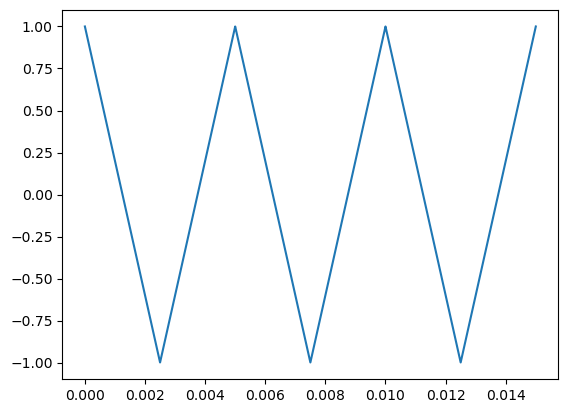

In [3]:
tri_amp=[]
t=[]
duration = 0.015

t = np.linspace(0,duration,10000)
tri_amp = triangle_wave(t,200,2)
plt.plot(t,tri_amp)

In [4]:
from IPython.display import Audio
t=[]
tri_amp=[]
duration = 0.5

t = np.linspace(0,duration,5000)
tri_amp = triangle_wave(t,200,2)

wave_apodize= apodize(tri_amp,10000)
audio = Audio(wave_apodize,rate=10000)
audio

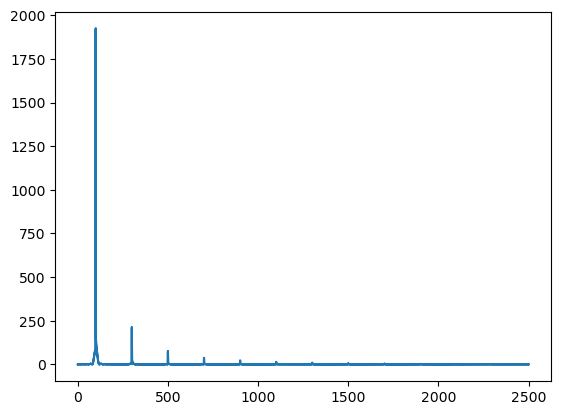

In [5]:
f,y = make_spectrum(wave_apodize,5000)
plt.plot(abs(f),abs(y))

# Square Signal

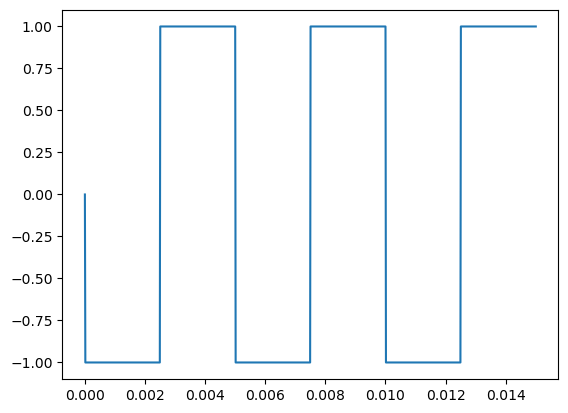

In [6]:
sqr_amp=[]
t=[]
duration = 0.015

t = np.linspace(0,duration,1000)
sqr_amp = square_wave(t,200,1)
plt.plot(t,sqr_amp)

In [7]:
from IPython.display import Audio
t=[]
sqr_amp=[]
duration = 0.5

t = np.linspace(0,duration,5000)
sqr_amp = square_wave(t,200,1)

wave_apodize= apodize(sqr_amp,10000)
audio = Audio(wave_apodize,rate=10000)
audio

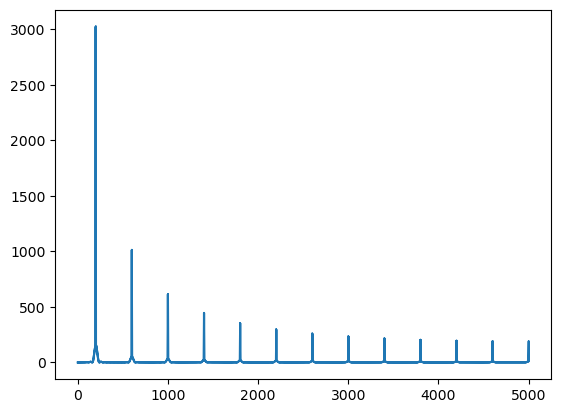

In [8]:
f,y = make_spectrum(wave_apodize,10000)
plt.plot(abs(f),abs(y))

## Sawtooth

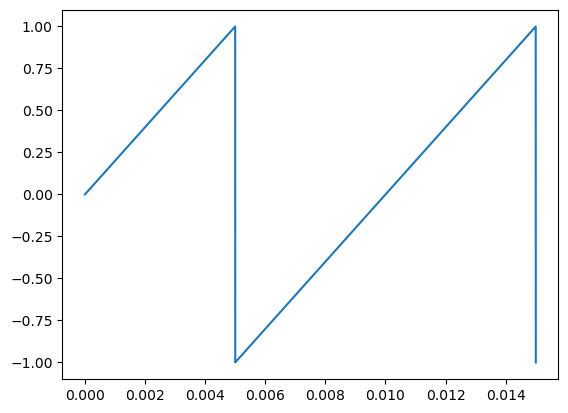

In [9]:
saw_amp=[]
t=[]
duration = 0.015

t = np.linspace(0,duration,5000)
saw_amp = saw_wave(t,100,1)
plt.plot(t,saw_amp)

In [10]:
t=[]
saw_amp=[]
duration = 0.5

t = np.linspace(0,duration,5000)
saw_amp = saw_wave(t,200,1)#idiot Thinkdsp didnt wrote it as 400 

wave_apodize= apodize(saw_amp,10000)
audio = Audio(wave_apodize,rate=10000)
audio

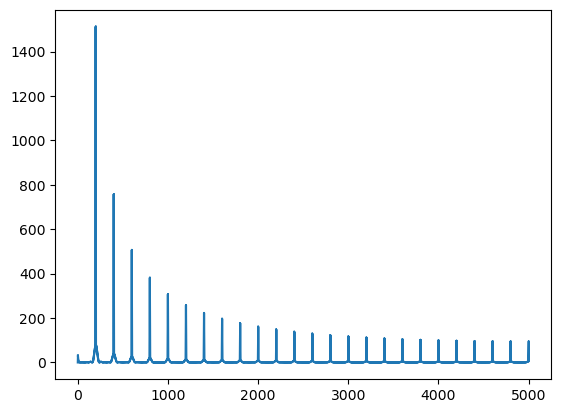

In [11]:
f,y = make_spectrum(wave_apodize,10000)
plt.plot(abs(f),abs(y))

## Aliasing

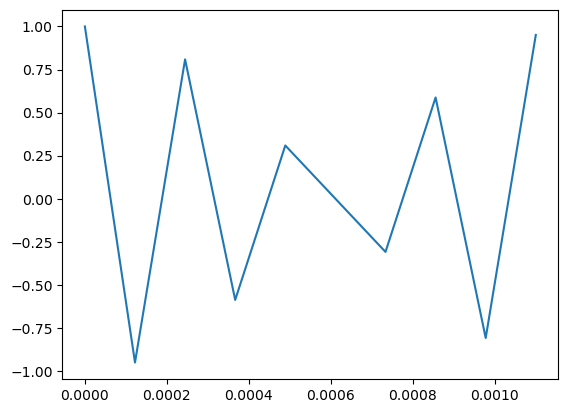

In [12]:
t1 = np.linspace(0,0.0011,10)
coswave1=cos_sig(t1,4500,1.0,0)

plt.plot(t1,coswave1)

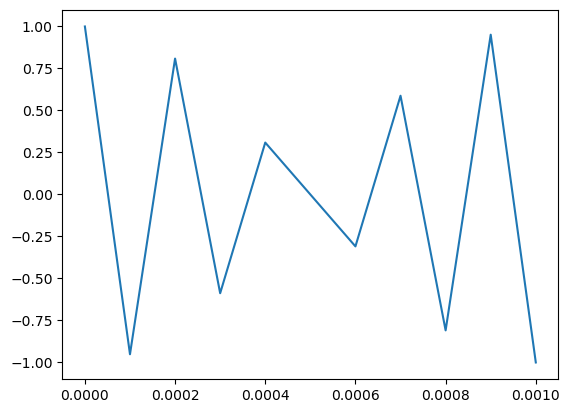

In [13]:
t2 = np.linspace(0,0.0010,11)
coswave2=cos_sig(t2,5500,1.0,0)

plt.plot(t2,coswave2)

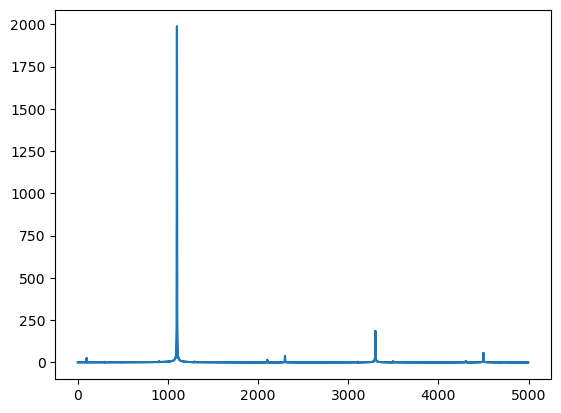

In [14]:
t=[]
tri_amp=[]
duration = 0.5

t = np.linspace(0,duration,5000)
tri_amp = triangle_wave(t,1100,2)
f_tri,y_tri = make_spectrum(tri_amp,10000)
plt.plot(abs(f_tri),abs(y_tri))

## Amplitude and phase

Make a sawtooth wave.

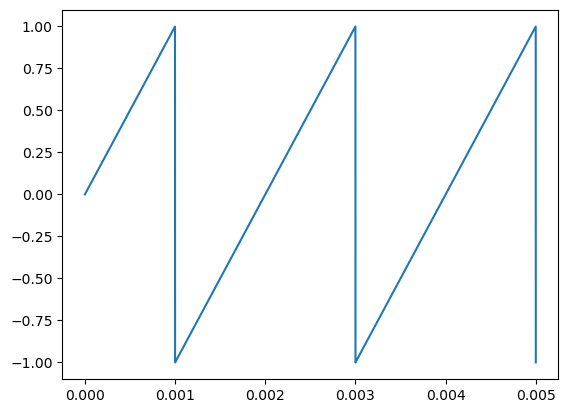

In [15]:
saw_amp=[]
t=[]
duration = 0.005

t = np.linspace(0,duration,5000)
saw_amp = saw_wave(t,500,1)
plt.plot(t,saw_amp)

In [16]:
saw_amp=[]
t=[]
duration = 1

t = np.linspace(0,duration,10000)
saw_amp = saw_wave(t,500,1)

audio = Audio(saw_amp,rate=10000)
audio

In [17]:
hs = np.fft.rfft(saw_amp)
hs

array([ 1.62344804e-10+0.00000000e+00j, -5.00050005e-02+1.59170855e+02j,
       -5.00050005e-02+7.95854196e+01j, ...,
       -5.00050005e-02+3.14190726e-05j, -5.00050005e-02+1.57095339e-05j,
       -5.00050005e+02+0.00000000e+00j])

In [27]:
n = len(saw_amp)                 # number of samples
d = 1 / 10000         # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

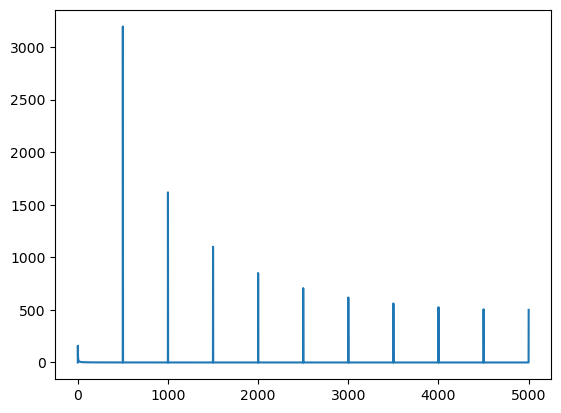

In [28]:
import matplotlib.pyplot as plt

magnitude = np.absolute(hs)
plt.plot(fs, magnitude)


[0.         1.57111049 1.57142465 ... 3.14096434 3.14127849 3.14159265]


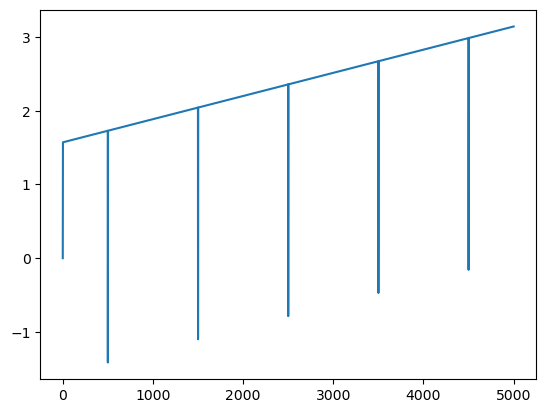

In [ ]:


from numpy import angle
angle = np.angle(hs)
print(angle)
plt.plot(fs, angle)


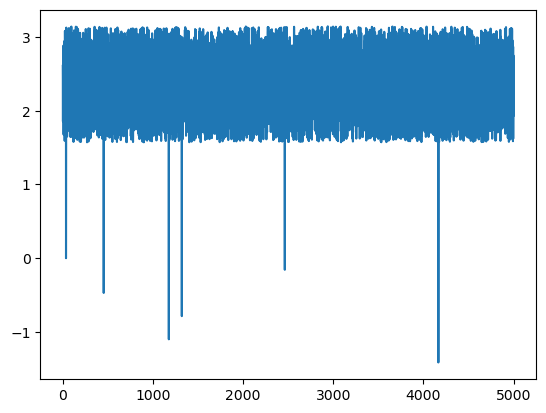

In [47]:
import random
random.shuffle(angle)
plt.plot(fs, angle)

